##### CIS 242

## Spring 2020

## HOMEWORK ASSIGNMENT 5

Please compile your responses use markdown in your Jupyter notebook to answer the questions.  If you prefer, you may also submit a Word or PDF document with the responses along the PDF or HTML version of the completed notebook.   

#### Active notebooks (.ipynb files) or raw code (.py files) will NOT be accepted and no points will be given.

The code part of the files will not be graded, but they will be checked if necessary to verify your findings and recommendations. Point deductions may occur if there are major discrepancies between your written answers and the output from the code. 

Please organize your notebook to have the homework responses at the top and the working code underneath.

Questions 1, 4,7,8 and 9 are worth 2 points each and questions 2,3, 5, and 6 are worth 3 points each for a total of **22 points**.

## Predicting Loans for Universal Bank

Remember: You were recently hired as a data scientist by Universal Bank. You now have a new tool to use to help the VP predict who might take out a personal loan. Use the data from previous weeks for this assignment. 

You are going to investigate using decision trees to help predict personal loans.  You know not to use zip codes as an explanatory variable but you can use all the other data available.  

#### 1.  Do you need to make any changes to the data to run a decision tree classifier? If so, what do you change and why? If not, why not? (2 points)

NB model 1 variables yielded the highest overall predictive accuracy in both NB and KNN models, so let us examine how they compare when run on a decision tree model. (Variables: Education, Securities Account, CD Account, Online, CreditCard) For these varaibles, we do not need to make any changes because the variables are already categorical. If any of them were continuous variables, they would have to changed in a categorical format by binning them.

In [1]:
import pandas as pd
import numpy as np
import io
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
#code borrowed from Professor Cannon's Lecture_5.pdf.

In [2]:
UB_db = pd.read_csv('UniversalBank.csv')
bank = pd.DataFrame(UB_db)

In [3]:
bank_indep1 = bank.drop(columns=['Age','Experience','Income','ZIP Code','Family','CCAvg','Mortgage'])

In [4]:
#move 'Personal Loan' column to the end to group predictors/independent varaibles together.
#code borrowed from https://stackoverflow.com/questions/13148429/how-to-change-the-order-of-dataframe-columns.
bank_indep1 = bank_indep1[['Education','Securities Account','CD Account','Online','CreditCard','Personal Loan']]

In [5]:
bank_indep1.head(3)

,Education,Securities Account,CD Account,Online,CreditCard,Personal Loan
0,1,1,0,0,0,0
1,1,1,0,0,0,0
2,1,0,0,0,0,0


#### 2. Train at least two different versions of a decision tree using both entropy and gini measures.  What differences do you get in the shape of the trees?  Why do you think that is? (3 points)

First, determine entropy measure of target variable(Personal Loan):

In [6]:
#count of people who took out a personal loan.
loan_count = 0
for i in bank['Personal Loan']:
    if i == 1:
        loan_count += 1

print('Number of people who took out a personal loan:', loan_count)

Number of people who took out a personal loan: 480


In [7]:
print('P(loan):', 480/5000)
print('P(no loan):', 4520/5000)

P(loan): 0.096
P(no loan): 0.904


In [8]:
#Entropy of our target varaible:
Ent_loan=((-480/5000)*np.log2(480/5000))-((4520/5000)*np.log2(4520/5000))
print('Takes out personal loan entropy:', Ent_loan.round(3))
#code borrowed from Professor Cannon's Lecture_5.pdf.

Takes out personal loan entropy: 0.456


Now determine entropy of taking out a personal loan and education, E(Personal Loan, Edcuation). In order to do so, we must first find out what proportion each education level takes up in the data set.

In [9]:
edu_1 = edu_2 = edu_3 = 0
for i in bank_indep1['Education']:
    if i == 1:
        edu_1 += 1
    elif i == 2:
        edu_2 += 1
    else:
        edu_3 += 1

print('Number of people with undergrad degree:', edu_1)
print('Number of people with grad degree:', edu_2)
print('Number of people with professional degree:', edu_3)
print('')
print('P(undergrad):', edu_1/5000)
print('P(grad):', edu_2/5000)
print('P(professional):', edu_3/5000)

Number of people with undergrad degree: 2096
Number of people with grad degree: 1403
Number of people with professional degree: 1501

P(undergrad): 0.4192
P(grad): 0.2806
P(professional): 0.3002


Let's now filter the data points by education level in order to calculate P(loan,undergrad), P(loan,grad), and P(loan,prof). The function below just shows some exploratory data.

In [10]:
undergrad_df = bank_indep1[bank_indep1['Education']==1]
grad_df = bank_indep1[bank_indep1['Education']==2]
prof_df = bank_indep1[bank_indep1['Education']==3]

In [11]:
def PL_prob(dataframe):
    num_loan = 0
    for i in dataframe['Personal Loan']:
        if i == 1:
            num_loan += 1
    num_total = dataframe.shape[0]
    loan_prob = num_loan/num_total
    return loan_prob

In [12]:
print('P(loan,undergrad):', PL_prob(undergrad_df))
print('P(loan,grad):', PL_prob(grad_df))
print('P(loan,prof):', PL_prob(prof_df))

P(loan,undergrad): 0.044370229007633585
P(loan,grad): 0.12972202423378476
P(loan,prof): 0.13657561625582945


Now let's visually represent the data as a dataframe.

In [13]:
#visual representation of proportion of people who took our personal loans in each education level.
Education = ['Undergrad','Grad','Prof','Total']
Yes = [93,182,205,480]
No = [2003,1221,1296,4520]
Total=[2096,1403,1501,5000]
edu_loan = pd.DataFrame([Education,Yes,No,Total]).T
edu_loan.columns = ['Education','Yes','No','Total']

edu_loan

,Education,Yes,No,Total
0,Undergrad,93,2003,2096
1,Grad,182,1221,1403
2,Prof,205,1296,1501
3,Total,480,4520,5000


Now we can calculate entropy values for each education level and the total entropy of education.

In [14]:
Ent_undergrad_loan = ((-93/2096)*np.log2(93/2096))-((2003/2096)*np.log2(2003/2096))
Ent_grad_loan = ((-182/1403)*np.log2(182/1403))-((1221/1403)*np.log2(1221/1403))
Ent_prof_loan = ((-205/1501)*np.log2(205/1501))-((1296/1501)*np.log2(1296/1501))
#code borrowed from Professor Cannon's Lecture_5.pdf.

print('Undergrad Entropy:', Ent_undergrad_loan.round(3))
print('Grad Entropy:', Ent_grad_loan.round(3))
print('Prof Entropy:', Ent_prof_loan.round(3))
print('')

Ent_edu_loan = (2096/5000)*Ent_undergrad_loan + (1403/5000)*Ent_grad_loan + (1501/5000)*Ent_prof_loan
print('Education Entropy:', Ent_edu_loan.round(3))

Undergrad Entropy: 0.262
Grad Entropy: 0.557
Prof Entropy: 0.575

Education Entropy: 0.439


Now we need to get the entropy values for the other varaibles in order to deduce which feature/varaible yields the largest gain.

Entropy of Securities Account:

In [15]:
#count of people who have a securities account.
sa_count = 0
for i in bank['Securities Account']:
    if i == 1:
        sa_count += 1

print('Number of people who have a securities account:', sa_count)

Number of people who have a securities account: 522


In [16]:
print('P(securities account):', 522/5000)
print('P(no securities account):', 4478/5000)

Ent_securities = ((-522/5000)*np.log2(522/5000))-((4478/5000)*np.log2(4478/5000))
print('Securities Account Entropy:', Ent_securities.round(3))

P(securities account): 0.1044
P(no securities account): 0.8956
Securities Account Entropy: 0.483


Entropy of CD Account:

In [17]:
#count of people who have a CD account.
cd_count = 0
for i in bank['CD Account']:
    if i == 1:
        cd_count += 1

print('Number of people who have a CD account:', cd_count)

Number of people who have a CD account: 302


In [18]:
print('P(CD account):', 302/5000)
print('P(no CD account):', 4698/5000)

Ent_cd = ((-302/5000)*np.log2(302/5000))-((4698/5000)*np.log2(4698/5000))
print('CD Account Entropy:', Ent_cd.round(3))

P(CD account): 0.0604
P(no CD account): 0.9396
CD Account Entropy: 0.329


Entropy of Online:

In [19]:
#count of people using online banking.
online_count = 0
for i in bank['Online']:
    if i == 1:
        online_count += 1

print('Number of people who do online banking:', online_count)

Number of people who do online banking: 2984


In [20]:
print('P(online):', 2984/5000)
print('P(not online):', 2016/5000)

Ent_online = ((-2984/5000)*np.log2(2984/5000))-((2016/5000)*np.log2(2016/5000))
print('Online Entropy:', Ent_online.round(3))

P(online): 0.5968
P(not online): 0.4032
Online Entropy: 0.973


Entropy of CreditCard:

In [21]:
#count of people with credit cards.
creditcard_count = 0
for i in bank['CreditCard']:
    if i == 1:
        creditcard_count += 1

print('Number of people with credit cards:', creditcard_count)

Number of people with credit cards: 1470


In [22]:
print('P(credit card):', 1470/5000)
print('P(no credit card):', 3530/5000)

Ent_creditcard = ((-1470/5000)*np.log2(1470/5000))-((3530/5000)*np.log2(3530/5000))
print('Credit Card Entropy:', Ent_creditcard.round(3))

P(credit card): 0.294
P(no credit card): 0.706
Credit Card Entropy: 0.874


Now we can determine which variable has the highest gain:

In [23]:
#Gain(Loan,Education) = Entropy(Loan)-Entropy(Loan,Education)
InfoGain_Edu = Ent_loan - Ent_edu_loan
print('Education Information Gain:', InfoGain_Edu.round(3))

#Gain(Loan,Securities Account) = Entropy(Loan)-Entropy(Loan,Securities Account)
InfoGain_SA = Ent_loan - Ent_securities
print('Securities Account Information Gain:', InfoGain_SA.round(3))

#Gain(Loan,CD Account) = Entropy(Loan)-Entropy(Loan,CD Account)
InfoGain_CD = Ent_loan - Ent_cd
print('CD Account Information Gain:', InfoGain_CD.round(3))

#Gain(Loan,Online) = Entropy(Loan)-Entropy(Loan,Online)
InfoGain_Online = Ent_loan - Ent_online
print('Online Banking Information Gain:', InfoGain_Online.round(3))

#Gain(Loan,CreditCard) = Entropy(Loan)-Entropy(Loan,CreditCard)
InfoGain_CreditCard = Ent_loan - Ent_creditcard
print('Credit Card Information Gain:', InfoGain_CreditCard.round(3))

#code borrowed from Professor Cannon's Lecture_5.pdf.

Education Information Gain: 0.017
Securities Account Information Gain: -0.027
CD Account Information Gain: 0.127
Online Banking Information Gain: -0.517
Credit Card Information Gain: -0.418


Based on the result above, 'CD Account' is the variable that returns the highest information gain. Therefore, whether haing a CD Account or not (0=no, 1=yes) will be the first splitting point of the tree.

In [24]:
bank_indep1.head(3)

,Education,Securities Account,CD Account,Online,CreditCard,Personal Loan
0,1,1,0,0,0,0
1,1,1,0,0,0,0
2,1,0,0,0,0,0


In [25]:
X1 = bank_indep1.iloc[:,0:5]
Y1 = bank_indep1.iloc[:,5]

In [26]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='entropy',random_state=12345)
dt.fit(X1,Y1)
#code borrowed from Professor Cannon's Lecture_5.pdf.

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=12345, splitter='best')

In [27]:
#shape of the tree
print(dt.tree_.max_depth) #number of split levels
print(dt.tree_.n_leaves) #total number of leaves
#code borrowed from Professor Cannon's Lecture_5.pdf.

6
35


Decision tree using entropy and information gain. The tree splits 6 times and produces 35 leaves.

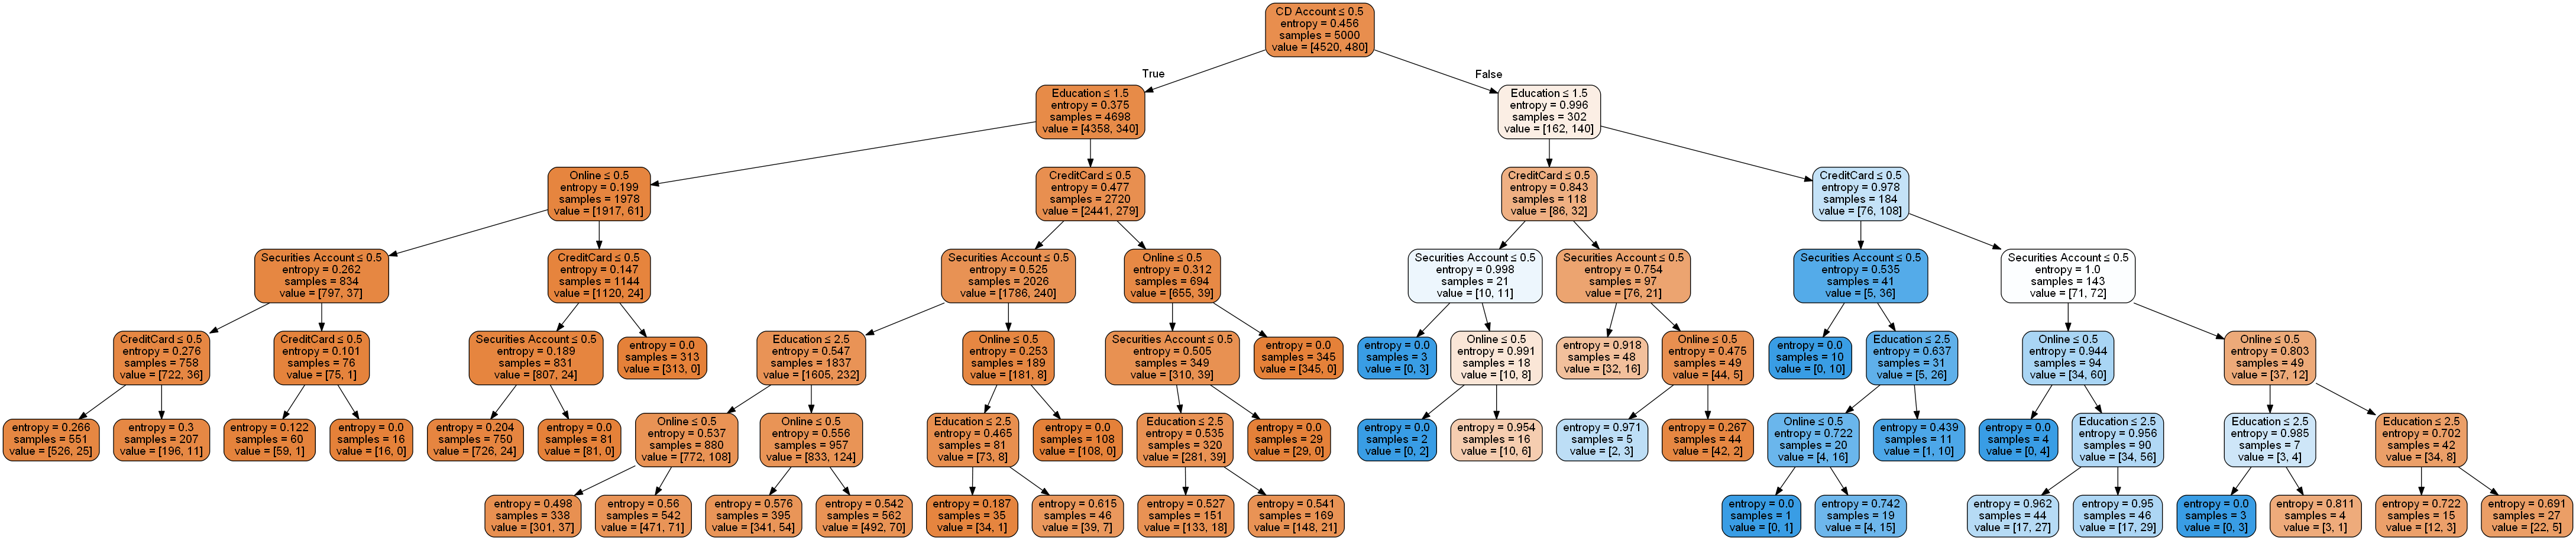

In [28]:
dot_data = io.StringIO()
export_graphviz(dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
               feature_names = X1.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

Now we will create a decision tree using the Gini index.

In [29]:
Gini_loan = 1-(((480/5000)**2)+((4520/5000)**2))
#code borrowed from Professor Cannon's Lecture_5.pdf.

print('Gini(take loan):',Gini_loan)

Gini(take loan): 0.17356799999999994


In [30]:
Gini_undergrad = 1-(((93/2096)**2)+((2003/2096)**2))
Gini_grad = 1-(((182/1403)**2)+((1221/1403)**2))
Gini_prof = 1-(((205/1501)**2)+((1296/1501)**2))

print('Gini(undergrad):',Gini_undergrad)
print('Gini(grad):',Gini_grad)
print('Gini(prof):',Gini_prof)
print('')

Gini_edu = (2096/5000)*Gini_undergrad + (1403/5000)*Gini_grad + (1501/5000)*Gini_prof
print('Gini(Education):',Gini_loan - Gini_edu)

Gini(undergrad): 0.08480302357088743
Gini(grad): 0.22578844132494824
Gini(prof): 0.2358454346003398

Gini(Education): 0.0038615364162814525


In [31]:
#Gini(Securities Account):
Gini_sa = 1-(((522/5000)**2)+((4478/5000)**2))

#Gini(CD Account):
Gini_cd = 1-(((302/5000)**2)+((4698/5000)**2))

#Gini(Online):
Gini_online = 1-(((2984/5000)**2)+((2016/5000)**2))

#Gini(CreditCard):
Gini_creditcard = 1-(((1470/5000)**2)+((3530/5000)**2))

print('Gini(securities account):',Gini_loan - Gini_sa)
print('Gini(CD account):',Gini_loan - Gini_cd)
print('Gini(online):',Gini_loan - Gini_online)
print('Gini(creditcard):',Gini_loan - Gini_creditcard)

Gini(securities account): -0.013433280000000103
Gini(CD account): 0.06006431999999995
Gini(online): -0.3076915200000001
Gini(creditcard): -0.2415600000000001


CD Account still wins.

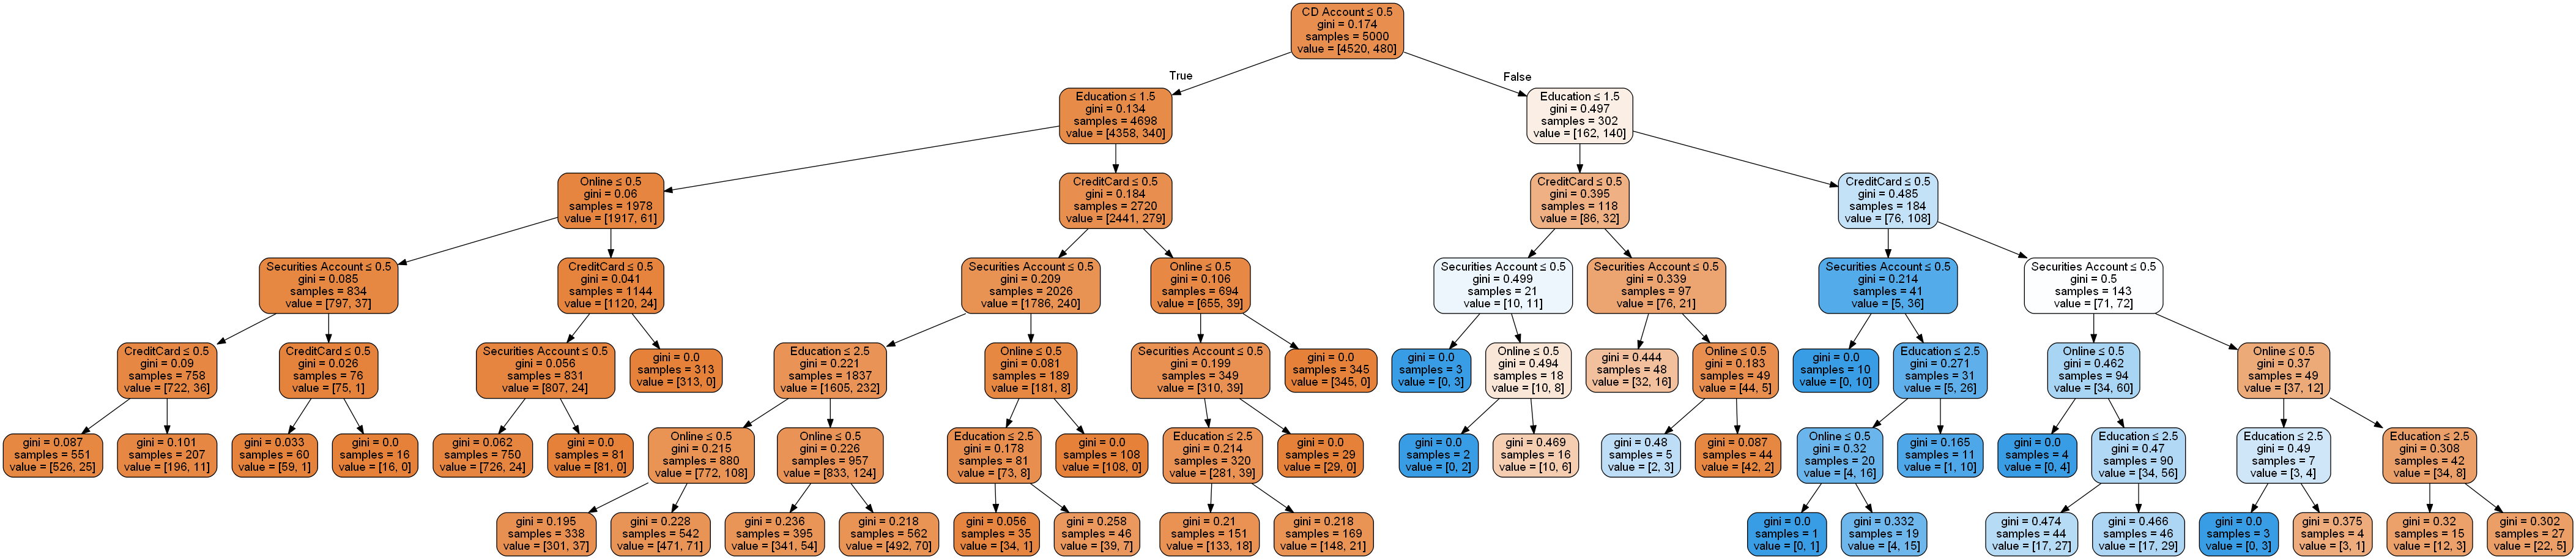

In [32]:
dt2 = DecisionTreeClassifier(criterion = "gini",random_state = 12345)
dt2.fit(X1, Y1)
dot_data = io.StringIO()
export_graphviz(dt2, out_file=dot_data,filled=True, rounded=True, special_characters=True,
               feature_names = X1.columns)
graph2 = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph2.create_png())
#code borrowed from Professor Cannon's Lecture_5.pdf.

In [33]:
#shape of the tree
print(dt2.tree_.max_depth) #number of split levels
print(dt2.tree_.n_leaves) #total number of leaves

6
35


There is no difference between the entropy and Gini decision trees. The tree splits six times and produces 35 leaves. This is presumably because the root node is 'CD Account', making the first split: 'Does the customer have a CD Account?' in both trees. Looking at both trees, one can examine that the nodes where the entropy measure is higher also has higher Gini measure, indicating that nodes with more uncertainties also are more impure. This explains why the two trees are identical.

#### 3.  Using code from lecture, investigate the first few levels of splits.  What variable(s) seem to contribute most to the reduction in uncertainty/increase in purity?  Does this surprise you? Why or why not? (3 points) (NOTE:  pictures are not necessary.  This question can be answered using the text representation of the tree.)

'CD Account' varaible seems to contribute most to the reduction in uncertainty as it yields the lowest entropy value and subsequently the highest information gain value as demonstrated in question 2. The next variable with the highest information gain is 'Education', which is where the next split happens. This is not surprising as the NB model's accuracy was higher when CD Account was one of the predictors compared to when it wasn't in the previous assignment. CD Account also had the largest coefficient when running a log regression test in relation to Personal Loan in assignment 3. These findings all seem to suggest that CD Account is the best predictor when it comes to predicting a customer's behavior with personal loans.

#### 4.  Choose one decision tree model and run it on your test data. What is the accuracy?  What did it do well?  Not so well? (2 points)

Testing the accuracy of the entropy decision tree:

In [34]:
#We will test the accuracy of the entropy decision tree.
from sklearn.model_selection import train_test_split

X = X1
Y = Y1

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=12345)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)
#code borrowed from Professor Cannon's Lecture_5.pdf.

(4000, 5) (1000, 5) (4000,) (1000,)


In [35]:
loan_dt = DecisionTreeClassifier(criterion = "entropy")
loan_dt.fit(X_train, Y_train)
dt_pred = loan_dt.predict(X_test)

print('Overall accuracy:', loan_dt.score(X_test, Y_test))
pd.crosstab(dt_pred, Y_test, rownames = ["Predicted"], colnames = ["Actual"])
#code borrowed from Professor Cannon's Lecture_5.pdf.

Overall accuracy: 0.919


Actual,0,1
Predicted,,
0,896,73
1,8,23


Overall accuracy of the entropy decision tree: 91.9%. The model has very well with high accuracy, but may have been overfitted. We will see if overfitting was the case by pruning it in the next question.

#### 5. Try pruning the tree using min_samples_split and/or min_impurity_decrease.  Try at least two combinations. How does the shape change?  Top predictor variables? Predictive accuracy? (3 points)

Setting min_impurity_decrease = .025

In [36]:
dt = DecisionTreeClassifier(criterion = "entropy", min_impurity_decrease = .025,random_state = 12345)
dt.fit(X, Y)

print(dt.cost_complexity_pruning_path(X, Y))
#code borrowed from Professor Cannon's Lecture_5.pdf.

{'ccp_alphas': array([0.        , 0.04393914]), 'impurities': array([0.41224696, 0.4561861 ])}


1
2


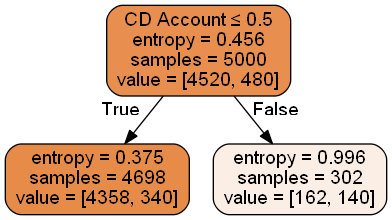

In [37]:
print(dt.tree_.max_depth)
print(dt.tree_.n_leaves)

dot_data = io.StringIO()
export_graphviz(dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
               feature_names = X.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())
#code borrowed from Professor Cannon's Lecture_5.pdf.

The decision tree was pre-pruned substantially, as evidenced above. Top predictor is still CD Account but only CD Account. The tree splits once and produce two leaves.

In [38]:
X_train, X_test, Y_train, Y_test = train_test_split(X[['CD Account']], Y, test_size = 0.2, random_state=12345)

dt = DecisionTreeClassifier(criterion = "entropy",random_state = 12345)
dt.fit(X_train, Y_train)
print(dt.tree_.max_depth)
print(dt.tree_.n_leaves)
dt_pred = dt.predict(X_test)

print(dt.score(X_test, Y_test))
pd.crosstab(dt_pred, Y_test, rownames = ["Predicted"], colnames = ["Actual"])
#code borrowed from Professor Cannon's Lecture_5.pdf.

1
2
0.904


Actual,0,1
Predicted,,
0,904,96


With CD Account as the only predictor, the accuracy of the model is still surprisingly high at 90.4%.

Setting min_samples_split = 3000

In [39]:
dt = DecisionTreeClassifier(criterion = "entropy", min_samples_split = 3000,random_state = 12345)
dt.fit(X, Y)

print(dt.cost_complexity_pruning_path(X, Y))
#code borrowed from Professor Cannon's Lecture_5.pdf.

{'ccp_alphas': array([0.        , 0.01397601, 0.04393914]), 'impurities': array([0.39827096, 0.41224696, 0.4561861 ])}


2
3


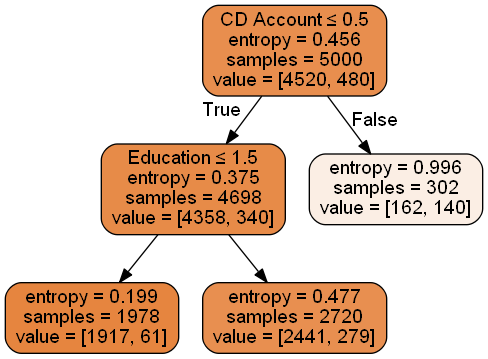

In [40]:
print(dt.tree_.max_depth) #number of split levels
print(dt.tree_.n_leaves)

dot_data = io.StringIO()
export_graphviz(dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
               feature_names = X.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())
#code borrowed from Professor Cannon's Lecture_5.pdf.

The decision tree was pre-pruned substantially, as evidenced above. Top predictor is Education with the lowest entropy measure of 0.375 and one of its leaves having a low entropy measure of 0.199. The next top predictor is CD Account. The tree splits twice and produces three leaves.

In [41]:
X_train, X_test, Y_train, Y_test = train_test_split(X[['Education']], Y, test_size = 0.2, random_state=12345)

dt = DecisionTreeClassifier(criterion = "entropy",random_state = 12345)
dt.fit(X_train, Y_train)
print(dt.tree_.max_depth)
print(dt.tree_.n_leaves)
dt_pred = dt.predict(X_test)

print(dt.score(X_test, Y_test))
pd.crosstab(dt_pred, Y_test, rownames = ["Predicted"], colnames = ["Actual"])

2
3
0.904


Actual,0,1
Predicted,,
0,904,96


Overall accuracy of this model is also 90.4%.

#### 6. Try pruning the tree using the cost complexity parameter.  Try at least two values. How does the shape change?  Top predictor variables? Predictive accuracy? (3 points)

Setting ccp_alpha = 0.015

In [42]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=12345)

dt = DecisionTreeClassifier(criterion = "entropy", ccp_alpha = 0.015,random_state = 12345)
dt.fit(X, Y)
print(dt.tree_.max_depth)
print(dt.tree_.n_leaves)
print(dt.cost_complexity_pruning_path(X_train, Y_train))
#code borrowed from Professor Cannon's Lecture_5.pdf.

1
2
{'ccp_alphas': array([0.00000000e+00, 8.79059796e-06, 1.42969883e-05, 1.48574377e-05,
       2.13842971e-05, 3.97778125e-05, 4.71187488e-05, 6.61150569e-05,
       8.67327820e-05, 1.12357294e-04, 1.12490451e-04, 2.36114219e-04,
       2.84245472e-04, 3.51185462e-04, 4.04950510e-04, 5.33969859e-04,
       5.47763389e-04, 6.69132388e-04, 8.52182233e-04, 8.67660727e-04,
       9.70650354e-04, 1.12782779e-03, 1.20396650e-03, 1.56568064e-03,
       1.99672754e-03, 5.55608305e-03, 5.79606324e-03, 6.05577473e-03,
       1.49300134e-02, 4.15911351e-02]), 'impurities': array([0.36065023, 0.36065902, 0.36067331, 0.36068817, 0.36070956,
       0.36074933, 0.36079645, 0.36086257, 0.3609493 , 0.36117401,
       0.3612865 , 0.36152262, 0.36180686, 0.36215805, 0.362563  ,
       0.36309697, 0.36364473, 0.36431387, 0.36516605, 0.36603371,
       0.36700436, 0.36813219, 0.36933615, 0.37246751, 0.37646097,
       0.38201705, 0.39360918, 0.39966495, 0.41459497, 0.4561861 ])}


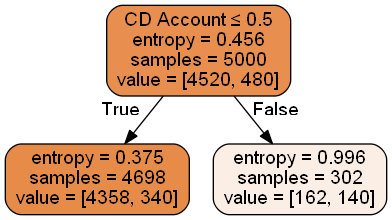

In [43]:
dot_data = io.StringIO()
export_graphviz(dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
               feature_names = X.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [44]:
X_train, X_test, Y_train, Y_test = train_test_split(X[['CD Account']], Y, test_size = 0.2, random_state=12345)

dt = DecisionTreeClassifier(criterion = "entropy",random_state = 12345)
dt.fit(X_train, Y_train)
dt_pred = dt.predict(X_test)

print(dt.score(X_test, Y_test))
pd.crosstab(dt_pred, Y_test, rownames = ["Predicted"], colnames = ["Actual"])

0.904


Actual,0,1
Predicted,,
0,904,96


CD Account is still the top predictor variable with an overall accuracy of 90.4%. The model splits once and produces two leaves.

Setting ccp_alpha = 0.02

In [45]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=12345)

dt = DecisionTreeClassifier(criterion = "entropy", ccp_alpha = 0.01,random_state = 12345)
dt.fit(X, Y)
print(dt.tree_.max_depth)
print(dt.tree_.n_leaves)
print(dt.cost_complexity_pruning_path(X_train, Y_train))
#code borrowed from Professor Cannon's Lecture_5.pdf.

2
3
{'ccp_alphas': array([0.00000000e+00, 8.79059796e-06, 1.42969883e-05, 1.48574377e-05,
       2.13842971e-05, 3.97778125e-05, 4.71187488e-05, 6.61150569e-05,
       8.67327820e-05, 1.12357294e-04, 1.12490451e-04, 2.36114219e-04,
       2.84245472e-04, 3.51185462e-04, 4.04950510e-04, 5.33969859e-04,
       5.47763389e-04, 6.69132388e-04, 8.52182233e-04, 8.67660727e-04,
       9.70650354e-04, 1.12782779e-03, 1.20396650e-03, 1.56568064e-03,
       1.99672754e-03, 5.55608305e-03, 5.79606324e-03, 6.05577473e-03,
       1.49300134e-02, 4.15911351e-02]), 'impurities': array([0.36065023, 0.36065902, 0.36067331, 0.36068817, 0.36070956,
       0.36074933, 0.36079645, 0.36086257, 0.3609493 , 0.36117401,
       0.3612865 , 0.36152262, 0.36180686, 0.36215805, 0.362563  ,
       0.36309697, 0.36364473, 0.36431387, 0.36516605, 0.36603371,
       0.36700436, 0.36813219, 0.36933615, 0.37246751, 0.37646097,
       0.38201705, 0.39360918, 0.39966495, 0.41459497, 0.4561861 ])}


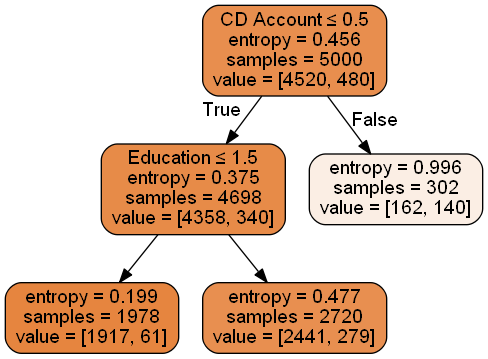

In [46]:
dot_data = io.StringIO()
export_graphviz(dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
               feature_names = X.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [47]:
X_train, X_test, Y_train, Y_test = train_test_split(X[['Education']], Y, test_size = 0.2, random_state=12345)

dt = DecisionTreeClassifier(criterion = "entropy",random_state = 12345)
dt.fit(X_train, Y_train)
dt_pred = dt.predict(X_test)
print(dt.tree_.max_depth)
print(dt.tree_.n_leaves)

print(dt.score(X_test, Y_test))
pd.crosstab(dt_pred, Y_test, rownames = ["Predicted"], colnames = ["Actual"])

2
3
0.904


Actual,0,1
Predicted,,
0,904,96


Education is the top predictor variable with an overall accuracy still being 90.4%. The model splits twice and produces three leaves.

#### 7. Try using Random Forest model.  Grow two forests with different numbers of trees.  How do the "important" feature differ from the single tree models?   (2 points)

In [48]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=12345)

# Instantiate model with 50 decision trees
rf = RandomForestClassifier(criterion = "entropy", random_state = 12345, n_estimators= 50)
rf.fit(X_train, Y_train)
#code borrowed from Professor Cannon's Lecture_5.pdf.

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=12345,
                       verbose=0, warm_start=False)

In [49]:
influence = pd.Series(rf.feature_importances_, index = X.columns)
influence.sort_values(inplace = True, ascending = False)
print(influence)

CD Account            0.476044
Education             0.208992
CreditCard            0.151784
Online                0.088892
Securities Account    0.074288
dtype: float64


Most important feature still remains to be CD Account.

In [50]:
# Instantiate model with 100 decision trees
rf = RandomForestClassifier(criterion = "entropy", random_state = 12345, n_estimators= 100)
rf.fit(X_train, Y_train)
#code borrowed from Professor Cannon's Lecture_5.pdf.

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=12345,
                       verbose=0, warm_start=False)

In [51]:
influence = pd.Series(rf.feature_importances_, index = X.columns)
influence.sort_values(inplace = True, ascending = False)
print(influence)

CD Account            0.477694
Education             0.208854
CreditCard            0.150027
Online                0.089482
Securities Account    0.073943
dtype: float64


Most important feature still remains to be CD Account. As it was the case with single tree models, CD Account appears to be the most important feature out of all the categorical variables in in the Universal Bank dataset.

#### 8. Test your random forest models.  How does their accuracy compare to the single tree based models? What do they do well or not so well? (2 points)

In [52]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=12345)

rf = RandomForestClassifier(criterion = "entropy", random_state = 12345)
rf.fit(X_train, Y_train)
rf_pred = rf.predict(X_test)

print(rf.score(X_test, Y_test))
pd.crosstab(rf_pred, Y_test, rownames = ["Predicted"], colnames = ["Actual"])

0.915


Actual,0,1
Predicted,,
0,892,73
1,12,23


The overall accuracy of the random forest model is 91.5%, slightly less than the single decision tree model's accuracy of 91.9%. This is probably attributable to the fact that we are only using 5 variables in this assignment and due to the relatively few number of varaibles we're using, a single decision tree is able to predict the outcome quite well. The forest model probably yields a very slightly lower accuracy because it takes the average of the trees, which may be more advantageous when there are more predictors/varaibles.

#### 9. Of all the models you have run for the VP of Universal Bank (Logistic, KNN, NB, DT, RF), which one gives the highest accuracy? Would you recommend that model to the VP?  Why or why not? (2 points)

Going back to the previous assignments, log regression yielded the highest accuracy of 95.7%. I would recommend that model because it takes in all the variables, not just categorical, and runs analysis. The more information about the customer, the more we can accurately predict the customer's behavior such as taking out a personal loan. Running multiple types of models (KNN:91.6%, NB:90.9%, DT:91.9%, RF:91.5%) with different variables did not produce a higher accuracy rate and also took much longer to conduct, because these models were very sensitive to the type of varaible (discrete/continuous). Attempting to choose the optimal group of variables and then choosing on which model to run would be very costly both in time and money. Log regression not only yields the highest accuracy but also prevents potential selection bias when selecting varaibles to run tests on.

#### Extra credit (5 points): Apply KNN, NB, and DT models to the graduate school admissions data we used with logistic regressions. What changes/assumptions do you need to make? Which model has the highest accuracy? 

In each model, target varaible will be 'admit' and the rest will be predictors.

KNN model: None of the varaibles need to be modified because they are all represented in numerics, even categorical variables such as 'admit' and 'rank'. However, the scales have to be standardized because they all have different scales.

In [53]:
graduates = pd.read_csv("https://stats.idre.ucla.edu/stat/data/binary.csv")
print(graduates.shape)
print(graduates.head(3))

(400, 4)
   admit  gre   gpa  rank
0      0  380  3.61     3
1      1  660  3.67     3
2      1  800  4.00     1


In [54]:
X = graduates.iloc[:,1:4]
Y = graduates.iloc[:,0]

from sklearn.preprocessing import MinMaxScaler
X= MinMaxScaler().fit_transform(X)

In [55]:
from sklearn.neighbors import KNeighborsClassifier

np.random.seed(123)
train = X_train
test = X_test
pred_knn = KNeighborsClassifier(n_neighbors = 2, metric = "euclidean")
pred_knn.fit(X_train, Y_train)
#code borrowed from Professor Cannon's CIS 242 Lecture_4.pdf

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [56]:
knn_pred = pred_knn.predict(X_test)
from sklearn.metrics import accuracy_score

print('Model accuracy:', accuracy_score(Y_test, knn_pred))
pd.crosstab(knn_pred, Y_test, rownames = ["Predicted"], colnames = ["Actual"])

Model accuracy: 0.916


Actual,0,1
Predicted,,
0,900,80
1,4,16


Overall accuracy of the KNN model comes out to be 91.6%.

NB Model: 'gpa' varaible is a continuous variable and therefore needs to be modified into a categorical/discrete variable using the ordinal encoder. 'gre' can also be perceived as a continuous variable at first glance but becaues it is not a float and has fixed number of students for each GRE score, it is more of a categorical variable strictly speaking in this case. However, it is expected that the encoder will also modify this variable as it perceives it as a continuous variable.

In [57]:
# Encode the data to make categoric variables into numeric
from sklearn.preprocessing import OrdinalEncoder
from sklearn.naive_bayes import MultinomialNB

oec = OrdinalEncoder()
graduates_encoded = pd.DataFrame(oec.fit_transform(graduates))

graduates_encoded.columns = graduates.columns
graduates_encoded.head(3)

,admit,gre,gpa,rank
0,0.0,4.0,95.0,2.0
1,1.0,18.0,101.0,2.0
2,1.0,25.0,131.0,0.0


In [58]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=12345)

NB=MultinomialNB()
NB.fit(X_train,Y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [59]:
nb_pred = NB.predict(X_test)

print('Model accuracy:', accuracy_score(Y_test, nb_pred))
pd.crosstab(nb_pred, Y_test, rownames = ["Predicted"], colnames = ["Actual"])
#code borrowed from Professor Cannon's CIS 242 Lecture_4.pdf.

Model accuracy: 0.625


Actual,0,1
Predicted,,
0,50,30


Overall accuracy of the NB model comes out to be 62.5%.

Entropy Decision Tree Model: We will be using the same X and Y variables from above models as they have already been encoded as categorical varaibles for the NB model.

In [60]:
X = graduates.iloc[:,1:4]
Y = graduates.iloc[:,0]

dt = DecisionTreeClassifier(criterion='entropy',random_state=12345)
dt.fit(X,Y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=12345, splitter='best')

In [61]:
print(dt.tree_.max_depth) #number of split levels
print(dt.tree_.n_leaves) #total number of leaves

19
146


In [62]:
admit_dt = DecisionTreeClassifier(criterion = "entropy")
admit_dt.fit(X_train, Y_train)
dt_pred = admit_dt.predict(X_test)

print('Overall accuracy:', admit_dt.score(X_test, Y_test))
pd.crosstab(dt_pred, Y_test, rownames = ["Predicted"], colnames = ["Actual"])

Overall accuracy: 0.6


Actual,0,1
Predicted,,
0,34,16
1,16,14


Overall accuracy of the Entropy DT model comes out to be 60%.

Gini Decision Tree Model: Same assumptions as Entropy DT model.

In [63]:
dt2 = DecisionTreeClassifier(criterion = "gini",random_state = 12345)
dt2.fit(X, Y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=12345, splitter='best')

In [64]:
print(dt2.tree_.max_depth) #number of split levels
print(dt2.tree_.n_leaves) #total number of leaves

17
148


In [65]:
admit_dt2 = DecisionTreeClassifier(criterion = "gini")
admit_dt2.fit(X_train, Y_train)
dt_pred = admit_dt2.predict(X_test)

print('Overall accuracy:', admit_dt2.score(X_test, Y_test))
pd.crosstab(dt_pred, Y_test, rownames = ["Predicted"], colnames = ["Actual"])

Overall accuracy: 0.5375


Actual,0,1
Predicted,,
0,37,24
1,13,6


Overall accuracy of the model comes out to be 53.75%.

KNN model seems to yield the highest accuracy score with this particular data set.

## Working code below

All working code is shown under each question.